<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Imbalanced_data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Imbalance Classification**
---
Hello data enthusiast,

We will conduct tutorial of supervised model binary classification, using imbalanced class datasets.

## Background
In a classification problem, a dataset is said to be imbalanced when the distribution of classes is not equal or not close to balanced.

For example in Loan default prediction:

* Default = 20%
* Paid on time = 80%

Although this kind of imbalance is natural in many real-world problems, it presents significant challenges during model training and evaluation.

## Challenges of Imbalanced Classification
1. Misleading Accuracy
Many models tend to be biased toward the majority class because optimizing accuracy alone would make the model favor predicting the dominant class.

* Example: If 95% of the data belongs to class 0, a model that always predicts 0 will have 95% accuracy—but 0% usefulness for detecting class 1.

2. Poor Performance on Minority Class
Machine learning algorithms may fail to learn meaningful patterns from the minority class due to insufficient representation. As a result:
* Recall on minority class is very low.
* The model rarely or never predicts the minority class.

3. Threshold Sensitivity
By default, models use 0.5 as the decision threshold, which often results in almost all predictions being classified as the majority class. Tuning this threshold is critical but not always straightforward.

4. Model Selection Becomes Tricky
Some models (like logistic regression, SVM, etc.) are sensitive to class imbalance and may require class weighting or resampling techniques to perform well.

## Common Solutions to Handle Imbalanced Data

1. Feature engineering
* Combine two or more features to highlight subtle patterns.
* Generating new feature or continuous variables into categories (bins), which can capture non-linear patterns.

2. Resampling Techniques

* Oversampling the minority class
* Undersampling the majority class

3. Algorithm-Level Strategies

* Use class weights (e.g.,class_weight='balanced' in scikit-learn models)
* Use specialized algorithms like XGBoost or Random Forest that handle imbalance better

4. Threshold Tuning

* Adjust decision threshold to favor the minority class
* Optimize based on F1 Score, Precision-Recall curve, or business context

5. Use Proper Evaluation Metrics

* Avoid relying on accuracy
* Focus on metrics that highlight minority class performance



In [3]:
# Installing additional library
!pip install category_encoders # Not available in colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.5 MB/s eta 0:00:00


In [4]:
# Import required libraries

# data wrangling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# remove warning
import warnings
warnings.filterwarnings('ignore')

# style (ggplot)
plt.style.use('ggplot')

## Feature Engineering

If the features we have are already good enough to distinguish between class 0 and class 1, then we can perform feature engineering (Polynomial Features) to improve the model's performance on data where the target is imbalanced.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
# loading dataset
url1 = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/white_wine.csv'
df = pd.read_csv(url1)[['density', 'alcohol', 'quality']]
df.head()

,density,alcohol,quality
0,1.0010,8.8,6.0
1,0.9940,9.5,6.0
2,0.9951,10.1,6.0
3,0.9956,9.9,6.0
4,0.9956,9.9,6.0


In [7]:
# quality > 6 is positive class (class 1)
# quality <= 6 is negative class (class 0)

df['quality'] = np.where(df['quality']>6, 1, 0)
df.head()

,density,alcohol,quality
0,1.0010,8.8,0
1,0.9940,9.5,0
2,0.9951,10.1,0
3,0.9956,9.9,0
4,0.9956,9.9,0


In [8]:
# Missing values
df.isna().sum()

,0
density,0
alcohol,1
quality,0


In [9]:
df = df.dropna()
df.shape

(519, 3)

In [10]:
df = df.drop_duplicates()
df.shape

(368, 3)

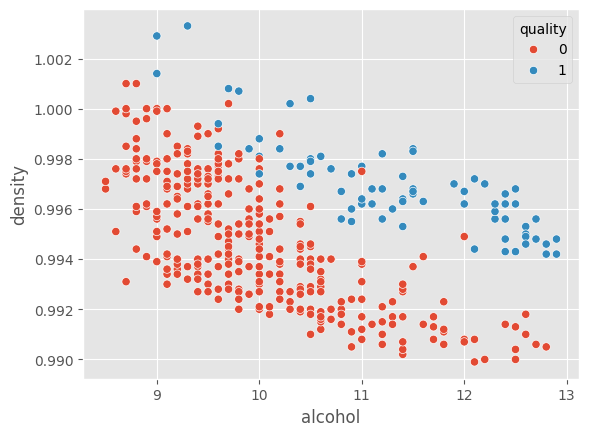

In [11]:
# Scatter plot
sns.scatterplot(data=df, x='alcohol', y='density', hue='quality');

In [12]:
# Define X y
X = df.drop(columns='quality')
y = df['quality']

In [13]:
y.value_counts() / len(y)
# imbalance

,count
quality,
0,0.80163
1,0.19837


In [14]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

**a. Model (without polynomial features)**

In [15]:
from sklearn.metrics import f1_score

In [16]:
# define algo
model = LogisticRegression(random_state=10)

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

f1_score(y_test, y_pred)

0.5217391304347826

**b. Model (with polynomial features)**

In [17]:
# define polynomial
poly = PolynomialFeatures(degree=3)

In [18]:
transformer = ColumnTransformer([
    ('poly', poly, ['alcohol', 'density'])
], remainder='passthrough')

In [19]:
# define models
model = LogisticRegression(random_state=10)

# pipeline to connect polynomial and modeling
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_poly = pipe_model.predict(X_test)

# accuracy_score(y_test, y_pred_poly)
f1_score(y_test, y_pred_poly)

0.8888888888888888

## Imbalance Treatment

We will compare 4 treatments with different scenarios on the imbalance dataset that consist of,
1. No treatment
2. Optimized threshold
3. Resampling (oversampling & undersampling)
4. Penalized model

In [20]:
# load dataset
url2 = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/bankloan.csv'
df = pd.read_csv(url2)[['employ', 'debtinc', 'creddebt', 'othdebt', 'default']]
df.head()

,employ,debtinc,creddebt,othdebt,default
0,17,9.3,11.359392,5.008608,1
1,10,17.3,1.362202,4.000798,0
2,15,5.5,0.856075,2.168925,0
3,15,2.9,2.658720,0.821280,0
4,2,17.3,1.787436,3.056564,1


In [21]:
df.shape

(700, 5)

In [22]:
df = df.dropna()
df.shape

(700, 5)

In [23]:
df = df.drop_duplicates()
df.shape

(700, 5)

In [24]:
# Define X y
X = df.drop(columns='default')
y = df['default']

In [25]:
y.value_counts()/len(y)
# imbalance

,count
default,
0,0.738571
1,0.261429


In [26]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [27]:
# Preprocessing
scaler = StandardScaler()

We can create a ColumnTransformer to combine several types/stages of preprocessing. However, because all the columns in this bankloan dataset are numerical and we will only be scaling them, we are not including it in the ColumnTransformer.

### **1. No Treatment**

Benchmark model

In [28]:
# Modeling

# algo
algo = LogisticRegression(random_state=0)

# pipeline
pipe_model = Pipeline([
    ('preprocessing', scaler),
    ('modeling', algo)
])

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_benchmark = pipe_model.predict(X_test)

# f1 score
f1_score(y_test, y_pred_benchmark)

0.6101694915254238

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
print(classification_report(y_test, y_pred_benchmark))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       103
           1       0.82      0.49      0.61        37

    accuracy                           0.84       140
   macro avg       0.83      0.72      0.75       140
weighted avg       0.83      0.84      0.82       140



In [31]:
confusion_matrix(y_test, y_pred_benchmark)

array([[99,  4],
       [19, 18]])

### **2. Optimized Threshold**

Looping through threshold values (probability boundaries for separating class 0 and class 1) to find the highest f1 score.

Looping through threshold value to find the highest f1 score.

In [32]:
# Modeling

# algo
algo = LogisticRegression(random_state=0)

# pipeline
pipe_model = Pipeline([
    ('preprocessing', scaler),
    ('modeling', algo)
])

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]  # Predicition result in the probability format)
y_pred_class = np.where(y_pred_proba > 0.50, 1, 0)     # Probability > 0.50 --> categorized as class 1

In [33]:
confusion_matrix(y_test, y_pred_class)

array([[99,  4],
       [19, 18]])

In [34]:
f1_score(y_test, y_pred_class)

0.6101694915254238

Looping to find the best threshold

In [35]:
# Modeling

# algo
algo = LogisticRegression(random_state=0)

# pipeline
pipe_model = Pipeline([
    ('preprocessing', scaler),
    ('modeling', algo)
])

# fit
pipe_model.fit(X_train, y_train)

# ==================================================================================
list_threshold = np.arange(0.01, 1.00, 0.01)
list_f1 = []

for threshold in list_threshold:

    # predict
    y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]       # Prediction result in form of probability
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)     # if probability higher than threshold --> considered as class 1

    # f1 score
    list_f1.append(f1_score(y_test, y_pred_class))

In [36]:
df_th = pd.DataFrame()
df_th['threshold'] = list_threshold
df_th['f1'] = list_f1

df_th.head()

,threshold,f1
0,0.01,0.435294
1,0.02,0.459627
2,0.03,0.474359
3,0.04,0.493333
4,0.05,0.506849


In [37]:
df_th.sort_values('f1', ascending=False).head(3)

,threshold,f1
23,0.24,0.653061
24,0.25,0.645833
22,0.23,0.640000


Best threshold = 0.24

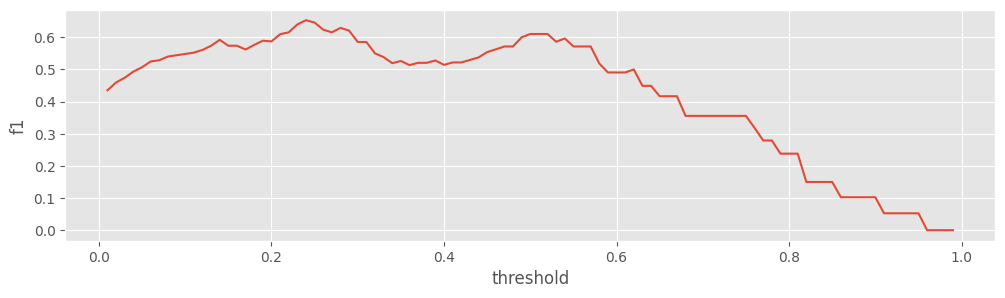

In [38]:
plt.figure(figsize=(12,3))
sns.lineplot(data=df_th, x='threshold', y='f1');

In [39]:
# Modeling dengan Best Threshold

# algo
algo = LogisticRegression(random_state=0)

# pipeline
pipe_model = Pipeline([
    ('preprocessing', scaler),
    ('modeling', algo)
])

# fit
pipe_model.fit(X_train, y_train)

# predict
best_threshold = 0.24

y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]            # Prediction result in form of probability
y_pred_optimized = np.where(y_pred_proba > best_threshold, 1, 0)     # yg probability-nya di atas 0.24 masuk ke kelas 1

# f1
f1_score(y_test, y_pred_optimized)

0.6530612244897959

In [40]:
print(f1_score(y_test, y_pred_benchmark), 'No treatment')
print(f1_score(y_test, y_pred_optimized), 'Optimized Threshold')

0.6101694915254238 No treatment
0.6530612244897959 Optimized Threshold


### **3. Resampling**

- Oversampling: Increasing the number of minority data (rows) in the minority class
- Undersampling: Decreasing the number of rows in the majority class


In [41]:
# pip install imblearn

In [42]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

**Undersampling**

In [43]:
y_train.value_counts()

,count
default,
0,414
1,146


In [44]:
# define resampler
under = RandomUnderSampler(random_state=0)

# fit & resample
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

In [45]:
y_train_under.value_counts()

,count
default,
0,146
1,146


**Oversampling**

In [46]:
y_train.value_counts()

,count
default,
0,414
1,146


In [47]:
# define resampler
over = RandomOverSampler(random_state=0)

# fit & resample
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

In [48]:
y_train_over.value_counts()

,count
default,
0,414
1,414


**Modeling**

In [49]:
# Pipeline from imblearn
from imblearn.pipeline import Pipeline
# Imblearn's pipeline can contain certain functions from sklearn dan imblearn

In [50]:
# Modeling

# algo
algo = LogisticRegression(random_state=0)

# pipeline
pipe_model = Pipeline([
    ('resampling', over),
    ('preprocessing', scaler),
    ('modeling', algo)
])

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_resampling = pipe_model.predict(X_test)

# f1 score
f1_score(y_test, y_pred_resampling)

0.6391752577319587

In [51]:
print(f1_score(y_test, y_pred_benchmark), 'No treatment')
print(f1_score(y_test, y_pred_optimized), 'Optimized Threshold')
print(f1_score(y_test, y_pred_resampling), 'Resampling - oversampling')

0.6101694915254238 No treatment
0.6530612244897959 Optimized Threshold
0.6391752577319587 Resampling - oversampling


### **4. Penalized Model**


The ML algorithm will give more attention to the minority class (class 1). Errors in the minority class (class 1) will be penalized more heavily than errors in the majority class (class 0)

In [52]:
y.value_counts()

,count
default,
0,517
1,183


In [53]:
517 / 183

2.8251366120218577

In [54]:
# Modeling

# algo
algo = LogisticRegression(random_state=0, class_weight='balanced')
#algo = LogisticRegression(random_state=0, class_weight={1:5})


# pipeline
pipe_model = Pipeline([
    ('preprocessing', scaler),
    ('modeling', algo)
])

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_penalize = pipe_model.predict(X_test)

# f1 score
f1_score(y_test, y_pred_penalize)

0.6236559139784946

In [55]:
print(f1_score(y_test, y_pred_benchmark), 'No treatment')
print(f1_score(y_test, y_pred_optimized), 'Optimized Threshold')
print(f1_score(y_test, y_pred_resampling), 'Resampling - oversampling')
print(f1_score(y_test, y_pred_penalize), 'Penalized model')

0.6101694915254238 No treatment
0.6530612244897959 Optimized Threshold
0.6391752577319587 Resampling - oversampling
0.6236559139784946 Penalized model


Conclusion: The optimized threshold has the highest f1-score.

**Good Job!**